In [8]:
import numpy as np
import pandas as pd
import seaborn as sn
import cv2
import matplotlib.pyplot as plt

In [9]:
img = cv2.imread('Kaggle\yes\y19.jpg')
img.shape

(337, 293, 3)

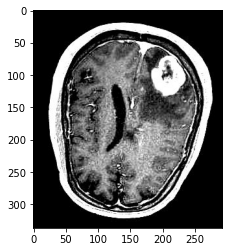

In [10]:
plt.imshow(img)

In [11]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [12]:
gray.shape

(337, 293)

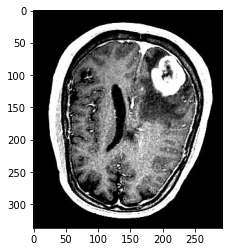

In [13]:
plt.imshow(gray,cmap='gray')

In [14]:
# Wavelet Transform

import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

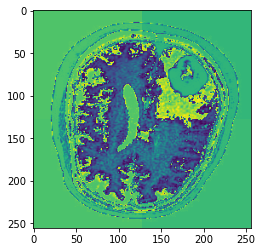

In [15]:
img2 = cv2.resize(img,(256,256))
img_har = w2d(img2,'db1',7)
plt.imshow(img_har)

In [18]:
img = cv2.resize(img,(256,256))
imArray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY )
imArray =  np.float32(imArray)   
imArray /= 255;
    # compute coefficients 
coeffs=pywt.wavedec2(imArray,'haar', level=1)

In [19]:
len(coeffs)

2

In [20]:

    #Process Coefficients
coeffs_H=list(coeffs)  
coeffs_H[0] *= 0;  

    # reconstruction
imArray_H=pywt.waverec2(coeffs_H,'haar');
imArray_H *= 255;
imArray_H =  np.uint8(imArray_H)

In [21]:
cA2 = coeffs[0]
(cH1,cV1,cD1) = coeffs[-1]
(cH2,cV2,cD2) = coeffs[-1]

Text(0.5, 1.0, 'Reconstructed Image')

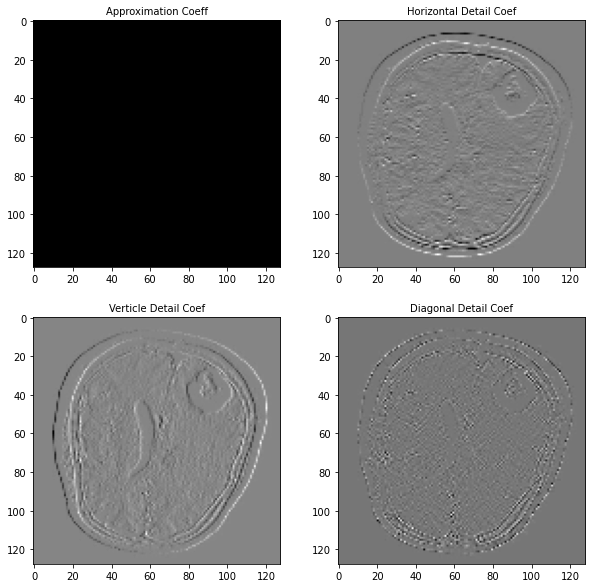

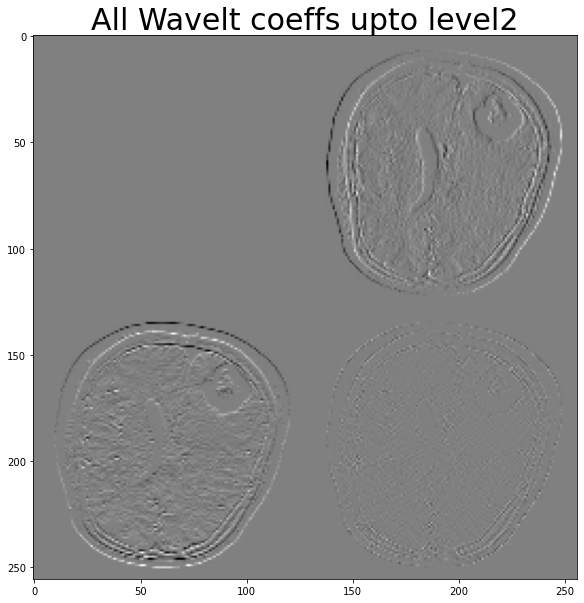

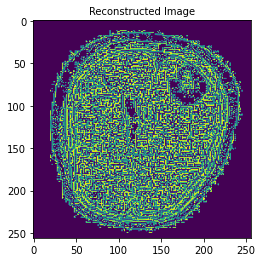

In [22]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(cA2,cmap = plt.cm.gray)
plt.title('Approximation Coeff', fontsize=10)

plt.subplot(2,2,2)
plt.imshow(cH2,cmap = plt.cm.gray)
plt.title('Horizontal Detail Coef', fontsize=10)

plt.subplot(2,2,3)
plt.imshow(cV2,cmap = plt.cm.gray)
plt.title('Verticle Detail Coef', fontsize=10)

plt.subplot(2,2,4)
plt.imshow(cD2,cmap = plt.cm.gray)
plt.title('Diagonal Detail Coef', fontsize=10)

arr, coef_slices = pywt.coeffs_to_array(coeffs)
plt.figure(figsize=(10,10))
plt.imshow(arr,cmap = plt.cm.gray)
plt.title('All Wavelt coeffs upto level2', fontsize=30)

coeffs[0] *= 0
imgr = pywt.waverec2(coeffs,'haar')
imgr *= 255
imgr =  np.uint8(imgr)
plt.figure()
plt.imshow(imgr)
plt.title('Reconstructed Image',fontsize=10)